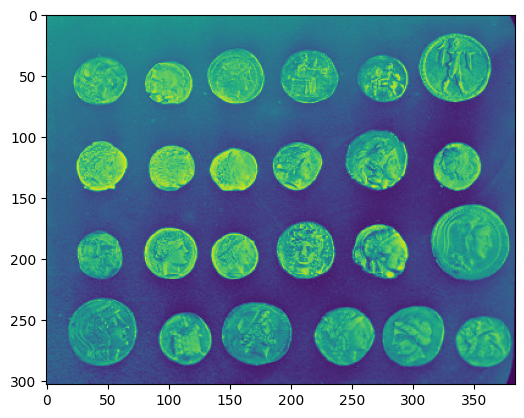

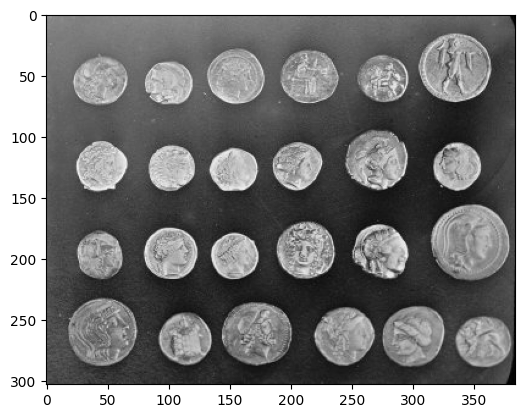

In [3]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from skimage.color import rgb2gray
from skimage import color
from skimage import io

# img = io.imread('Altstadt-Dresden-1180x786.jpg')
# imgGray = color.rgb2gray(img)

# io.imshow(imgGray)
# plt.figure()
# plt.imshow(imgGray, cmap=plt.cm.gray)

# print(imgGray.shape)
coins = data.coins()
gCoins = coins
plt.imshow(coins)
plt.figure()
plt.imshow(gCoins, cmap=plt.cm.gray)
# original = data.astronaut()
# grayscale = rgb2gray(original)

# fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# ax = axes.ravel()

# ax[0].imshow(original)
# ax[0].set_title("Original")
# ax[1].imshow(grayscale, cmap=plt.cm.gray)
# ax[1].set_title("Grayscale")

# fig.tight_layout()
# plt.show()

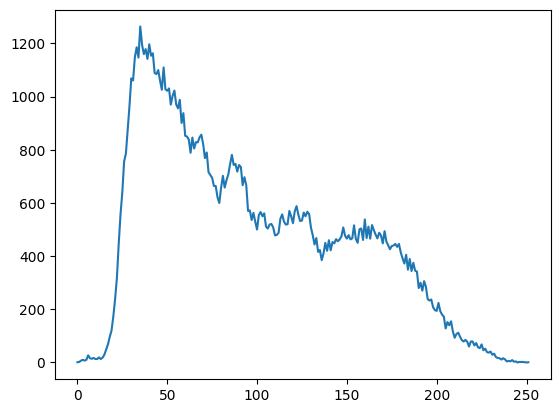

In [4]:
hist, hist_centers = histogram(gCoins)
plt.plot(hist)
plt.show()

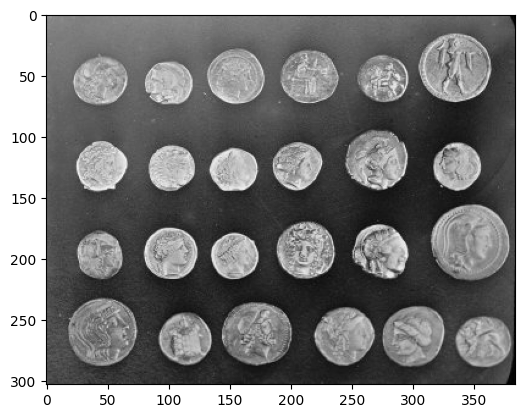

In [5]:
plt.imshow(gCoins, cmap=plt.cm.gray)

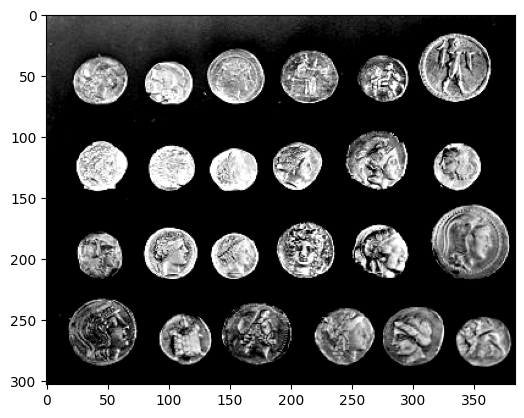

In [24]:
b = coins.copy()

ThresholdUp = 199
ThresholdBottom = 100
b = np.clip(b, ThresholdBottom, ThresholdUp)

plt.imshow(b, cmap=plt.cm.gray)

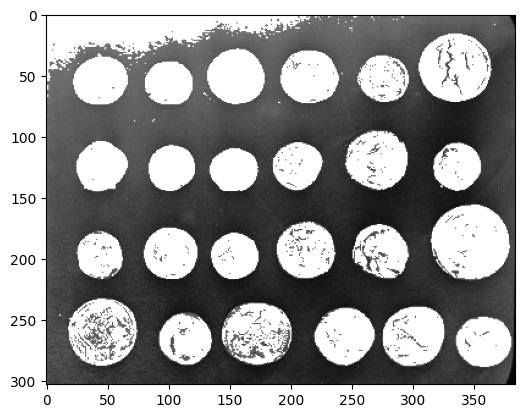

In [22]:
c = gCoins.copy()
# quasi invertiert das vorherige alle Pixel im Intervall werden weiß
_thUp = 255
_thLow = 115
_indexes = np.where((gCoins>_thLow) & (gCoins<_thUp))
c[_indexes] = 255
plt.imshow(c, cmap=plt.cm.gray)


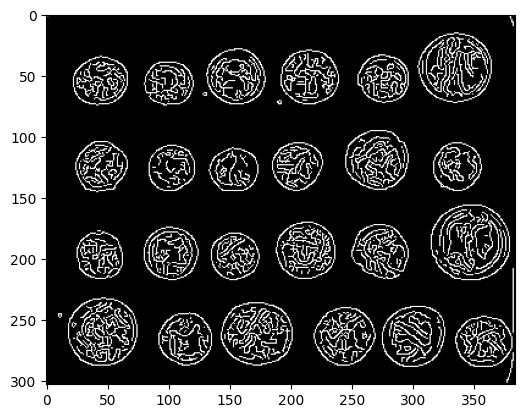

In [8]:
from skimage.feature import canny
edges = canny(gCoins/255.)
plt.imshow(edges, cmap=plt.cm.gray)

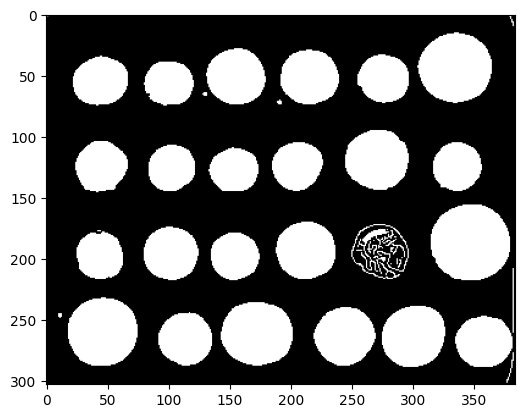

In [9]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins, cmap=plt.cm.gray)

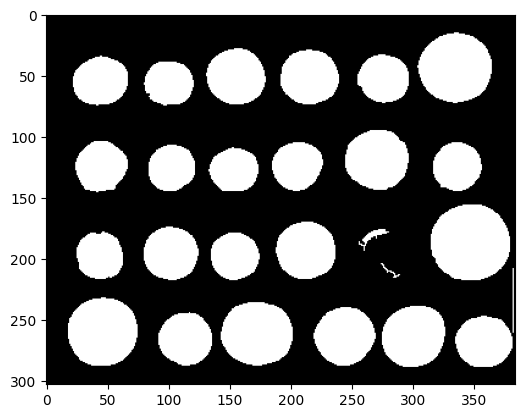

In [10]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]
plt.imshow(coins_cleaned, cmap=plt.cm.gray)

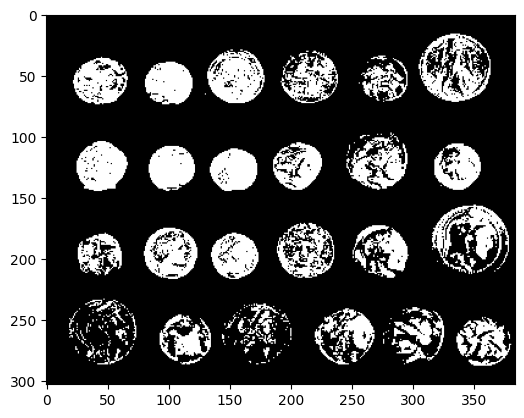

In [11]:
markers = np.zeros_like(coins)
markers[coins < 30] = 0
markers[coins > 150] = 255
plt.imshow(markers, cmap=plt.cm.gray)

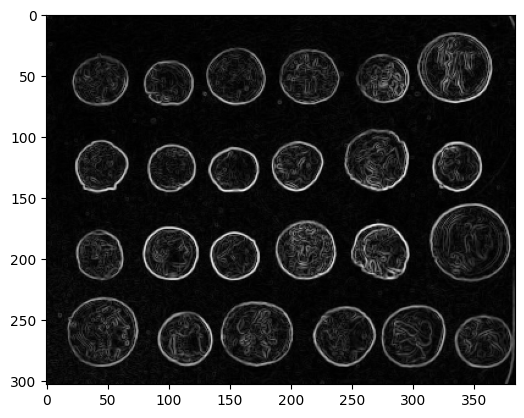

In [12]:
from skimage.filters import sobel
elevation_map = sobel(coins)
plt.imshow(elevation_map, cmap=plt.cm.gray)


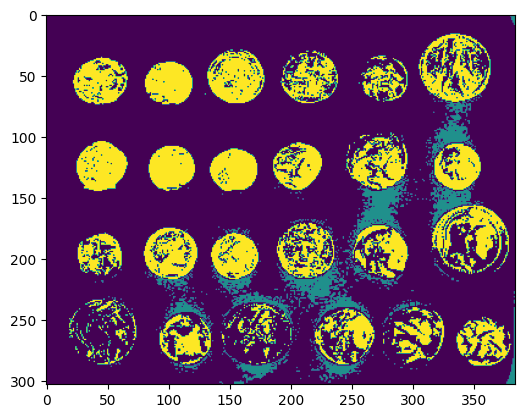

In [13]:
from skimage.segmentation import watershed

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

plt.imshow(markers)

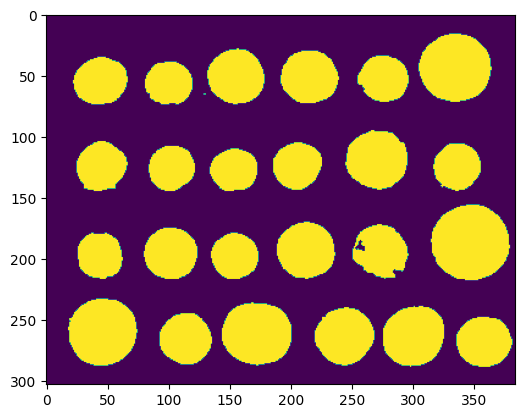

In [14]:
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation)

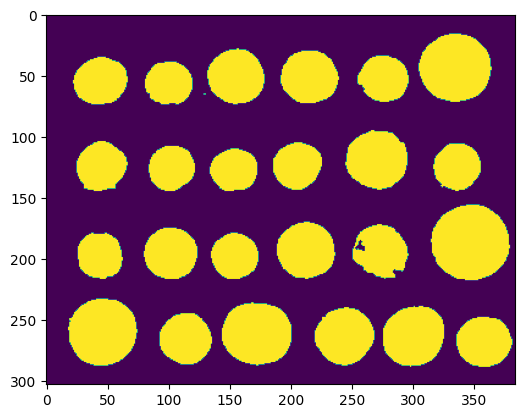

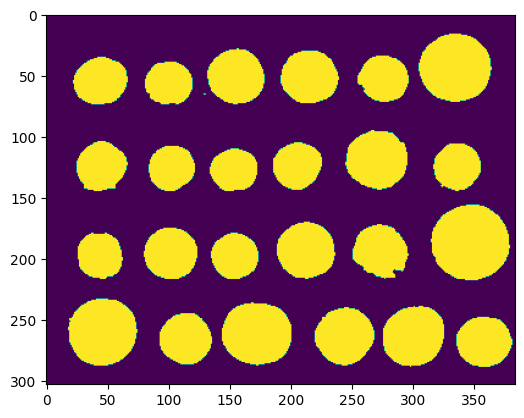

In [15]:
elevation_map = sobel(coins)

markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
segmentation = watershed(elevation_map, markers)
segmentation1 = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(segmentation)
plt.figure()
plt.imshow(segmentation1)

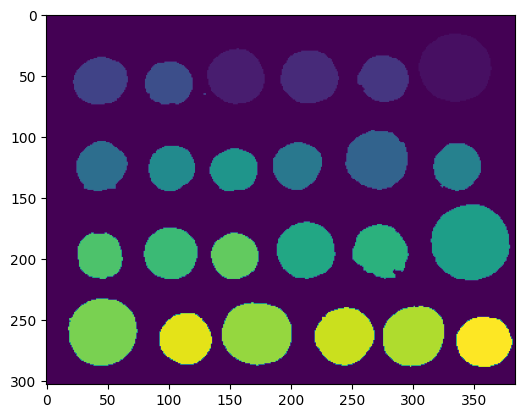

In [16]:
labeled_coins, _ = ndi.label(segmentation1)
plt.imshow(labeled_coins)